In [1]:
import numpy as np

class ACO():
    def __init__(self, nCitys, nAnts, alpha=1, beta=2, evapRate=0.3):
        self.nCitys = nCitys
        self.nAnts = nAnts
        self.alpha = alpha
        self.beta = beta
        self.evapRate = evapRate
        
    def findNextPosition(self, cur_loc, pheromone, temp_visibility):
        combine_feature = np.zeros(self.nCitys)
        cum_prob = np.zeros(self.nCitys)
        temp_visibility[:,cur_loc] = 0     #making visibility of the current city as zero

        p_feature = np.power(pheromone[cur_loc,:],beta)         #calculating pheromne feature 
        v_feature = np.power(temp_visibility[cur_loc,:],alpha)  #calculating visibility feature

        p_feature = p_feature[:,np.newaxis]                     #adding axis to make a size[5,1]
        v_feature = v_feature[:,np.newaxis]                     #adding axis to make a size[5,1]

        combine_feature = np.multiply(p_feature,v_feature)     #calculating the combine feature

        total = np.sum(combine_feature)                        #sum of all the feature
        if total == 0:
            probs = 1
        else:
            # finding probability of element probs(i) =
            # comine_feature(i)/total
            probs = combine_feature / total

        cum_prob = np.cumsum(probs)     #calculating cummulative sum
        #print(cum_prob)
        r = np.random.random_sample()   #randon no in [0,1)
        #print(r)
        city = np.nonzero(cum_prob>r)[0][0]+1
        return city
    
    def updatePheromone(self, dist_cost, pheromone, trails):
        p = pheromone.copy()
        for i in range(self.nAnts):
            for j in range(self.nCitys-1):
                dt = 1/dist_cost[i]
                p[trails[i,j]-1,trails[i,j+1]-1] = (1-self.evapRate)*pheromone[trails[i,j]-1,trails[i,j+1]-1] + dt                                            
        return p
                
    
    def trailLength(self, trails, costMatrix):
        dist_cost = np.zeros((self.nAnts,1)) 
        for i in range(self.nAnts):
            sum = 0
            for j in range(self.nCitys-1):
                sum = sum + costMatrix[trails[i,j]-1,\
                               trails[i,j+1]-1]   #calcualting total tour distance
                dist_cost[i] = sum   
        return dist_cost
    
    
    def optimizer(self, costMatrix, maxIter=1000):
        visibility = 1/costMatrix
        visibility[visibility == np.inf] = 0
        pheromone = .1*np.ones((self.nCitys, self.nCitys))
        trails = np.ones((self.nAnts, self.nCitys+1), dtype=int)
        
        it = 0
        best_route_cost = []
        iterations = []
        while(it < maxIter):
            trails[:,0] = 1
            for iAnt in range(self.nAnts):
                temp_visibility = np.array(visibility)
                
                for iCity in range(self.nCitys - 1):
                    cur_loc = trails[iAnt, iCity] - 1
                    trails[iAnt, iCity+1] = self.findNextPosition(cur_loc,pheromone, temp_visibility)
                
#                 trails[iAnt, -2] = list(set([i for i in range(1,self.nCitys+1)])-set(trails[iAnt,:-2]))[0]
            
            trails_opt = np.array(trails)               #intializing optimal route
            dist_cost = self.trailLength(trails_opt, costMatrix)
            #intializing total_distance_of_tour with zero   
            dist_min_loc = np.argmin(dist_cost)
            dist_min_cost = dist_cost[dist_min_loc]
            
            best_route = trails[dist_min_loc,:]
            if(it% 1 == 0):
                iterations.append(it)
                best_route_cost.append(int(dist_min_cost[0]) + costMatrix[int(best_route[-2])-1,0])
            pheromone = self.updatePheromone(dist_cost, pheromone, trails)
            it+=1
        return best_route, iterations,best_route_cost
    

In [2]:
import numpy as np

[ 1  2  3  4  5  6  7 11  8  9 10  1] best_val 2252.2874


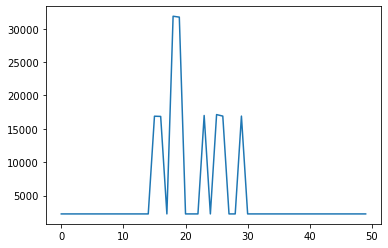

In [3]:
# Input Parameters

import matplotlib.pyplot as plt



# costMatrix = np.zeros((nCitys, nCitys)
# costMatrix = np.array([[0,10,12,11]
#           ,[10,0,13,15]
#           ,[12,13,0,9]
#           ,[11,15,9,0]])

# costMatrix = np.array([[0, 266.6538, 15000, 15000, 15000, 15000, 388.4219,427.6574, 15000, 262.287, 295.6253]
#           ,[266.6538, 0, 320.6497, 15000, 15000, 15000,15000, 15000, 15000, 15000, 15000]
#           ,[15000, 320.6497, 0, 219.4997, 15000, 15000, 15000, 15000, 15000,15000, 170.118]
#           ,[15000, 15000, 219.4997, 0, 166.0354, 15000, 15000 ,15000 ,15000 ,15000, 15000]
#           ,[15000, 15000, 15000, 166.0354, 0, 138.238, 15000, 15000, 15000, 15000, 15000]
#           ,[15000, 15000, 15000, 15000,138.283, 0, 152.842,15000, 15000, 15000, 15000]
#           ,[388.4219,15000, 15000, 15000, 15000, 152.842, 0, 182.6261,15000, 15000, 193.4845]
#           ,[427.6574, 15000, 15000, 15000, 15000, 15000, 182.6261, 0, 192.3555, 15000, 232.7199]
#           ,[15000, 15000, 15000, 15000, 15000, 15000, 15000,192.3555, 0, 107.5493, 15000]  
#           ,[262.2874, 15000, 15000, 15000, 15000, 15000, 15000, 15000,107.5493, 15000, 15000]
#           ,[295.6253, 0, 170.118, 15000, 15000, 15000, 193.4845,232.7199,15000, 15000, 0]])

#data = np.load('att48.npz', allow_pickle=True)
#lst = data.files
#costMatrix=data[lst[1]]

#costMatrix = np.array([[15000, 266.6538, 15000, 15000, 15000, 15000, 388.4219,427.6574, 15000, 262.287, 295.6253]
#          ,[266.6538, 15000, 320.6497, 15000, 15000, 15000,15000, 15000, 15000, 15000, 15000]
#          ,[15000, 320.6497, 15000, 219.4997, 15000, 15000, 15000, 15000, 15000,15000, 170.118]
#          ,[15000, 15000, 219.4997, 15000, 166.0354, 15000, 15000 ,15000 ,15000 ,15000, 15000]
#          ,[15000, 15000, 15000, 166.0354, 15000, 138.238, 15000, 15000, 15000, 15000, 15000]
#          ,[15000, 15000, 15000, 15000,138.283, 15000, 152.842,15000, 15000, 15000, 15000]
#          ,[388.4219,15000, 15000, 15000, 15000, 152.842, 15000, 182.6261,15000, 15000, 193.4845]
#          ,[427.6574, 15000, 15000, 15000, 15000, 15000, 182.6261, 15000, 192.3555, 15000, 232.7199]
#          ,[15000, 15000, 15000, 15000, 15000, 15000, 15000,192.3555, 15000, 107.5493, 15000]  
#          ,[262.2874, 15000, 15000, 15000, 15000, 15000, 15000, 15000,107.5493, 15000, 15000]
#          ,[295.6253, 15000, 170.118, 15000, 15000, 15000, 193.4845,232.7199,15000, 15000, 15000]])
nCitys = costMatrix.shape[0]
nAnts = 5; 
alpha, beta, evapRate = 1.5, 1.5, 0.2

maxIters = 50 # np.arange(50, 150, 10)

nAnt_vals =  [10, 20, 30, 40]
# best_val = np.zeros_like(nAnt_vals)

a = ACO(nCitys, 30, alpha= alpha, beta=beta, evapRate=evapRate)
m, iters, best_val = a.optimizer(costMatrix, maxIter= 50)
plt.plot(iters, best_val)
# plt.ylim(0, 10000)

print(m, "best_val" , best_val[-1])

In [76]:
costMatrix.shape
# visibility = 1/costMatrix #[costMatrix != 0]
# print(visibility)
# visibility[visibility == np.inf] = 0

(11, 11)

In [24]:
costMatrix[costMatrix != 0]

array([10, 12, 11, 14, 10, 13, 15,  8, 12, 13,  9, 14, 11, 15,  9, 16, 14,
        8, 14, 16])

In [25]:
costMatrix

array([[ 0, 10, 12, 11, 14],
       [10,  0, 13, 15,  8],
       [12, 13,  0,  9, 14],
       [11, 15,  9,  0, 16],
       [14,  8, 14, 16,  0]])

In [27]:
np.arange(10, 80, 10)

array([10, 20, 30, 40, 50, 60, 70])